## NLP & Binary Classification: Toxic Comment Classification Challenge
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

** Dataset Information: **

- a large number of Wikipedia comments which have been labeled by human raters for toxic behavior 

** Attribute Information:**

- id	
- comment_text
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate                

** Objective of this project **

- Identify and classify toxic online comments


# Data

In [0]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load Data
filepath = 'drive/app/toxic/'
df = pd.read_csv(filepath+'train.csv')
pd.set_option('display.max_colwidth', -1)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [8]:
df.comment_text.tail(10)

159561    "\nNo he did not, read it again (I would have thought everyone here could recite it by heart by now) it says ""Are we truly to believe the arbcom are so thankful for that, and Jimbo was ever so taken with her"".  The arbcom having read the evidence are now voting to thank her - so it is a very valid question. Kelly always implied she was a friend of Jimbo's.  Good for her, that must be very pleasant for them both.  However, I can't imagine Jimbo was particularly impressed by that blog either.  If you actually read the blog, not just what was pasted to wiki, there is a lot of information on her views in other areas. I was also commenting on those. I don't imagine Jimbo is much impressed by me or many others concerned with whole rotten case either, but it's all a bit late for those concerns now. Now this is actually Bishonen's page, so my further views will be posted on my own page, if I decide to post them that is, because I too am heartily sick of this whole case, it is just 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

0    144277
1    15294 
Name: toxic, dtype: int64

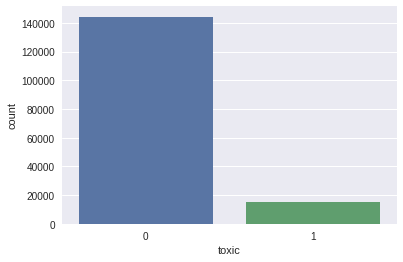

In [10]:
# inspect label --> only 'toxic' used in this analysis
sns.countplot(df['toxic'])
df['toxic'].value_counts() #imbalanced

In [11]:
# text length
df['text_length'] = df['comment_text'].apply(len)
df[['toxic','comment_text','text_length']].head()

,toxic,comment_text,text_length
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",264
1,0,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",112
2,0,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",233
3,0,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,622
4,0,"You, sir, are my hero. Any chance you remember what page that's on?",67


In [12]:
df['text_length'].describe()

count    159571.000000
mean     394.073221   
std      590.720282   
min      6.000000     
25%      96.000000    
50%      205.000000   
75%      435.000000   
max      5000.000000  
Name: text_length, dtype: float64

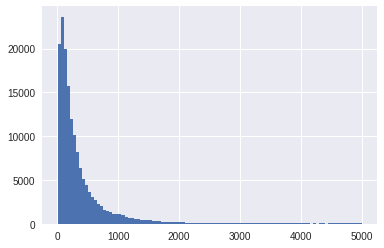

In [15]:
df['text_length'].hist(bins=100)

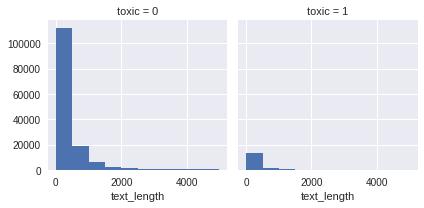

In [16]:
g = sns.FacetGrid(df,col='toxic')
g.map(plt.hist,'text_length')

(-100, 1100)

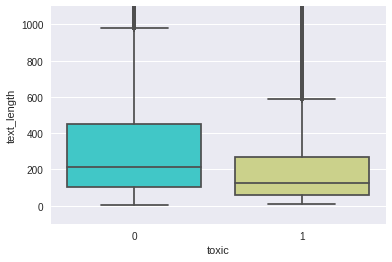

In [18]:
sns.boxplot(x='toxic',y='text_length',data=df,palette='rainbow')
plt.ylim([-100,1100])

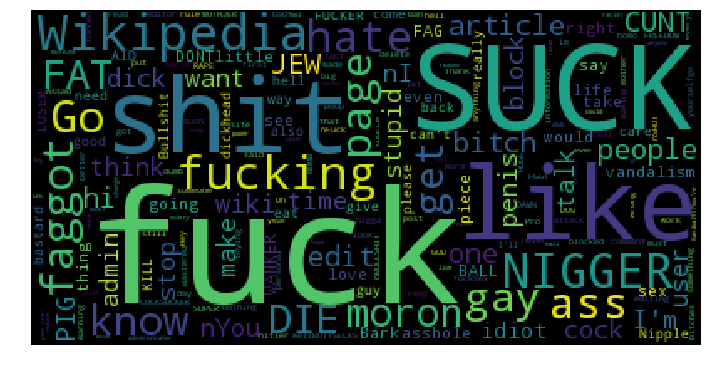

In [11]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = df[df['toxic']==1]['comment_text'].to_string()
wordcloud = WordCloud(
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english')),
    collocations=False).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Data Preprocessing

#### Spilt Train Test sets

In [0]:
X = df['comment_text']
y = df['toxic'].values

seed = 101
np.random.seed(seed)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(127656,) (31915,) (127656,) (31915,)


#### Tokenize

In [14]:
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [15]:
len(X_train)
#X_train[:10]
#tokenizer.word_counts
#tokenizer.word_index

127656

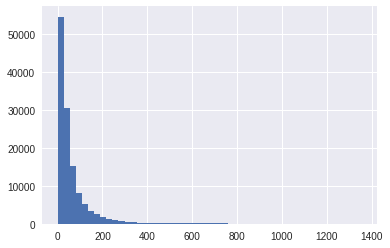

In [37]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 50)
plt.show()

In [16]:
from keras.preprocessing import sequence
max_words = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[np.argmax(totalNumWords)]

(127656, 200) (31915, 200)


# 1. MLP

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Dropout,Conv1D,MaxPooling1D,LSTM,GRU
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
import keras.backend as K

batch_size = 128
epochs = 5

def create_nn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [20]:
# create the model
model = create_nn()
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               5120200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10050     
__________

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

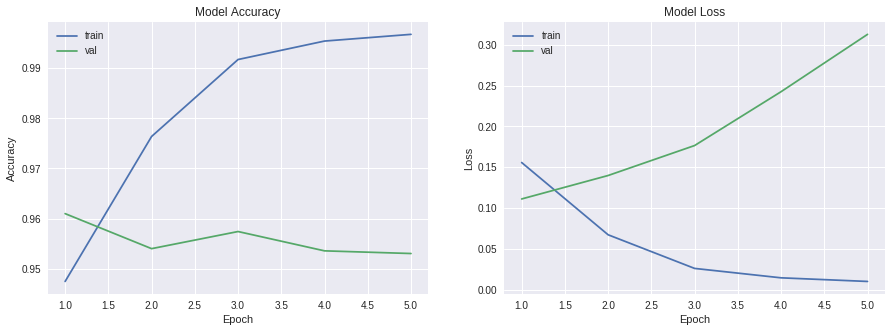

In [22]:
plot_model_history(model_history)

In [0]:
def model_evaluate():
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))
    print('roc auc:\t{:0.3f}'.format(roc_auc_score(y_test,y_pred_test)))

    #classification report
    print('\n')
    print(classification_report(y_test, y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	95.3%
roc auc:	0.851


             precision    recall  f1-score   support

          0       0.97      0.98      0.97     28856
          1       0.77      0.72      0.75      3059

avg / total       0.95      0.95      0.95     31915



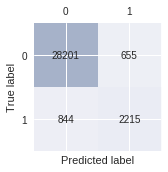

In [24]:
model_evaluate()

# 2. CNN

In [0]:
def create_cnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [27]:
# create the model
model = create_cnn()
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 32)           12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
___________________________________________________________

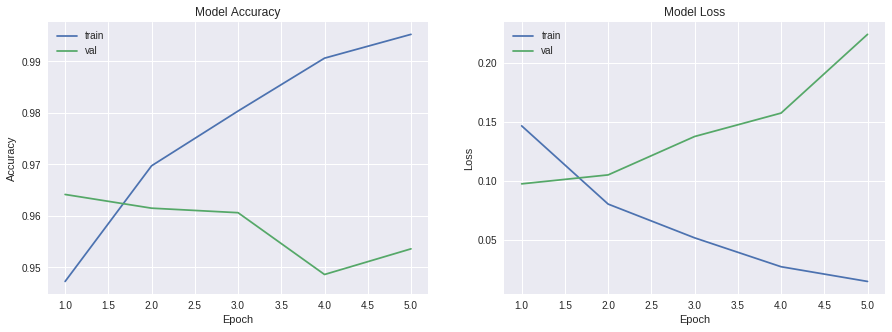

In [29]:
plot_model_history(model_history)

Accuracy:	95.4%
roc auc:	0.867


             precision    recall  f1-score   support

          0       0.97      0.97      0.97     28856
          1       0.76      0.76      0.76      3059

avg / total       0.95      0.95      0.95     31915



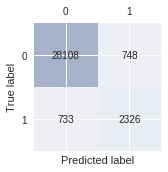

In [30]:
model_evaluate()